# Gradient Descent Vs SkLearn (Linear Regression)

   Sample X  Sample Y
0         1      1.50
1         2      2.25
2         3      4.00
3         4      3.65
4         5      5.00
5         6      7.10
6         7      7.30
7         8      8.90
8         9      9.50
9        10     11.00
Using Batch GD:
Slope= 1.048549 and Intercept= 0.259975
Time taken= 0.034875

Using Mini Batch GD:
Slope= 1.039711 and Intercept= 0.222701
Time taken= 0.158608

Using SGD:
Slope= 1.013828 and Intercept= 0.223259
Time taken= 0.400927

Using Scikit:
Slope= 1 and Intercept= 0.226667
Time taken= 0.0010013580



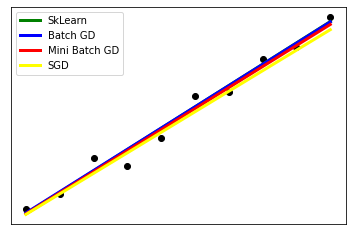

In [102]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import linear_model
import time
data = pd.read_csv('D:/Chrome Downloads/Book1.csv', ',',
                   usecols=['Sample X', 'Sample Y', ])
print(data)

matrix = np.array(data.values,'float')
x = matrix[:,0]
y = matrix[:,1]

x=x.flatten()
y=y.flatten()

N=x.shape[0] #total no. of samples
m=random.uniform(0,5) #slope of random line chosen by us (0-5)
c=random.uniform(0,5) #y-intercept of that line


#alpha= learning rate
#iter= no. of iteration

#Batch Gradient Descent
def BatchGD(x,y,total, slope, intercept, alpha=0.01,iter=1000):
    for i in range(iter):
        d_m= 2*np.sum(x*((slope*x+intercept) -y))/total
        d_c= 2*np.sum(((slope*x+intercept) -y))/total
        slope =slope- alpha* d_m #new slope
        intercept =intercept- alpha* d_c #new y-intercept
    return [slope,intercept]

#function to get mini batches randomly
def getMiniBatches(x, y, batchSize, total):
    shuffle=np.random.permutation(total)
    for i in range(0,total,batchSize):                               
        if i < total:
            batch=shuffle[i:i+batchSize]
        else:
            batch=shuffle[i:total] #for last minibatch
        yield x[batch], y[batch]

#Minibatch Gradient Descent
def miniBatchGD(x,y,total, slope, intercept, batchSize, alpha=0.01, iter=1000):
    for i in range(iter):
        for x_batch, y_batch in getMiniBatches(x, y, batchSize, total): #go through all mini batches
            d_m= 2*np.sum(x_batch*((slope*x_batch+intercept) -y_batch))/batchSize
            d_c= 2*np.sum(((slope*x_batch+intercept) -y_batch))/batchSize
            slope =slope- alpha* d_m #new slope
            intercept =intercept- alpha* d_c #new y-intercept
    return [slope,intercept]

#Total Time taken for each Method
start1=time.time()

m1= BatchGD(x,y,N,m,c)[0]
c1= BatchGD(x,y,N,m,c)[1]
y_predict1=m1*x + c1 #Y for Batch GD
end1=time.time()

start2=time.time()

m2= miniBatchGD(x,y,N,m,c,3)[0]
c2= miniBatchGD(x,y,N,m,c,3)[1]
y_predict2=m2*x + c2 #Y for Mini Batch GD
end2=time.time()


#We can see SGD as a mini batch GD with each batch size=1
start3=time.time()

m3= miniBatchGD(x,y,N,m,c,1)[0]
c3= miniBatchGD(x,y,N,m,c,1)[1]
y_predict3=m3*x + c3 #Y for  SGD
end3=time.time()

#Using Sklearn
start4=time.time()
regr = linear_model.LinearRegression()
x=x.reshape(-1,1)
regr.fit(x, y)
y_pred = regr.predict(x)
m4=regr.coef_
c4=regr.intercept_
end4=time.time()


print("Using Batch GD:")
print("Slope= %f" %m1 +" and Intercept= %f" %c1)
print("Time taken= %f" %(end1-start1))
print()

print("Using Mini Batch GD:")
print("Slope= %f" %m2 +" and Intercept= %f" %c2)
print("Time taken= %f" %(end2-start2))
print()

print("Using SGD:")
print("Slope= %f" %m3 +" and Intercept= %f" %c3)
print("Time taken= %f" %(end3-start3))
print()

print("Using Scikit:")
print("Slope= %d" %m4 +" and Intercept= %f" %c4)
print("Time taken= %.10f" %(end4-start4))
print()


plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='green', linewidth=3)
plt.plot(x, y_predict1, color='blue', linewidth=3)
plt.plot(x, y_predict2, color='red', linewidth=3)
plt.plot(x, y_predict3, color='yellow', linewidth=3)

plt.legend(labels=['SkLearn', 'Batch GD', 'Mini Batch GD', 'SGD'])
plt.xticks(())
plt.yticks(())

plt.show()
